In [3]:
import pandas as pd
import numpy as np
import folium
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
house_csv = pd.read_csv(r"C:\Users\Sanjeshni\Desktop\doc\DATA\Sacramento_transactions.csv")

house = house_csv

In [38]:
house.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [6]:
house.tail()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
980,9169 GARLINGTON CT,SACRAMENTO,95829,CA,4,3,2280,Residential,Thu May 15 00:00:00 EDT 2008,232425,38.457679,-121.359620
981,6932 RUSKUT WAY,SACRAMENTO,95823,CA,3,2,1477,Residential,Thu May 15 00:00:00 EDT 2008,234000,38.499893,-121.458890
982,7933 DAFFODIL WAY,CITRUS HEIGHTS,95610,CA,3,2,1216,Residential,Thu May 15 00:00:00 EDT 2008,235000,38.708824,-121.256803
983,8304 RED FOX WAY,ELK GROVE,95758,CA,4,2,1685,Residential,Thu May 15 00:00:00 EDT 2008,235301,38.417000,-121.397424
984,3882 YELLOWSTONE LN,EL DORADO HILLS,95762,CA,3,2,1362,Residential,Thu May 15 00:00:00 EDT 2008,235738,38.655245,-121.075915


In [8]:
house.shape

(985, 12)

In [30]:
house.isnull().sum()

street       0
city         0
zip          0
state        0
beds         0
baths        0
sq__ft       0
type         0
sale_date    0
price        0
latitude     0
longitude    0
dtype: int64

In [31]:
house.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
street,985,981,8306 CURLEW CT,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
city,985,39,SACRAMENTO,439,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zip,985.0,NaN,NaN,NaN,95750.697462,85.176072,95603.0,95660.0,95762.0,95828.0,95864.0
state,985,1,CA,985,NaN,NaN,NaN,NaN,NaN,NaN,NaN
beds,985.0,NaN,NaN,NaN,2.911675,1.307932,0.0,2.0,3.0,4.0,8.0
baths,985.0,NaN,NaN,NaN,1.77665,0.895371,0.0,1.0,2.0,2.0,5.0
sq__ft,985.0,NaN,NaN,NaN,1314.916751,853.048243,0.0,952.0,1304.0,1718.0,5822.0
type,985,4,Residential,917,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sale_date,985,5,Mon May 19 00:00:00 EDT 2008,268,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,985.0,NaN,NaN,NaN,234144.263959,138365.839085,1551.0,145000.0,213750.0,300000.0,884790.0


In [32]:
house['zip']  = house['zip'].astype(str)

In [33]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   street     985 non-null    object 
 1   city       985 non-null    object 
 2   zip        985 non-null    object 
 3   state      985 non-null    object 
 4   beds       985 non-null    int64  
 5   baths      985 non-null    int64  
 6   sq__ft     985 non-null    int64  
 7   type       985 non-null    object 
 8   sale_date  985 non-null    object 
 9   price      985 non-null    int64  
 10  latitude   985 non-null    float64
 11  longitude  985 non-null    float64
dtypes: float64(2), int64(4), object(6)
memory usage: 92.5+ KB


<AxesSubplot:>

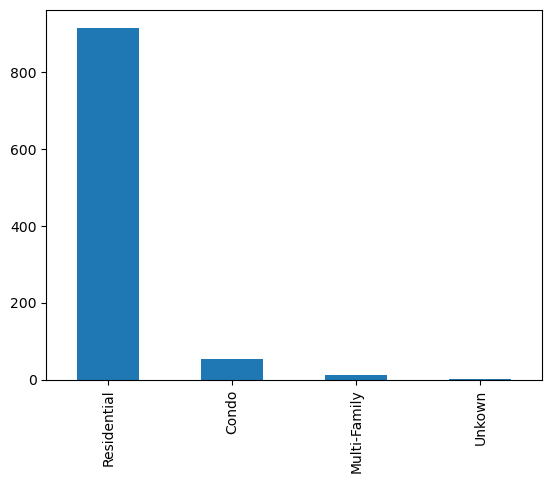

In [34]:
house['type'].value_counts().plot(kind='bar')

<AxesSubplot:>

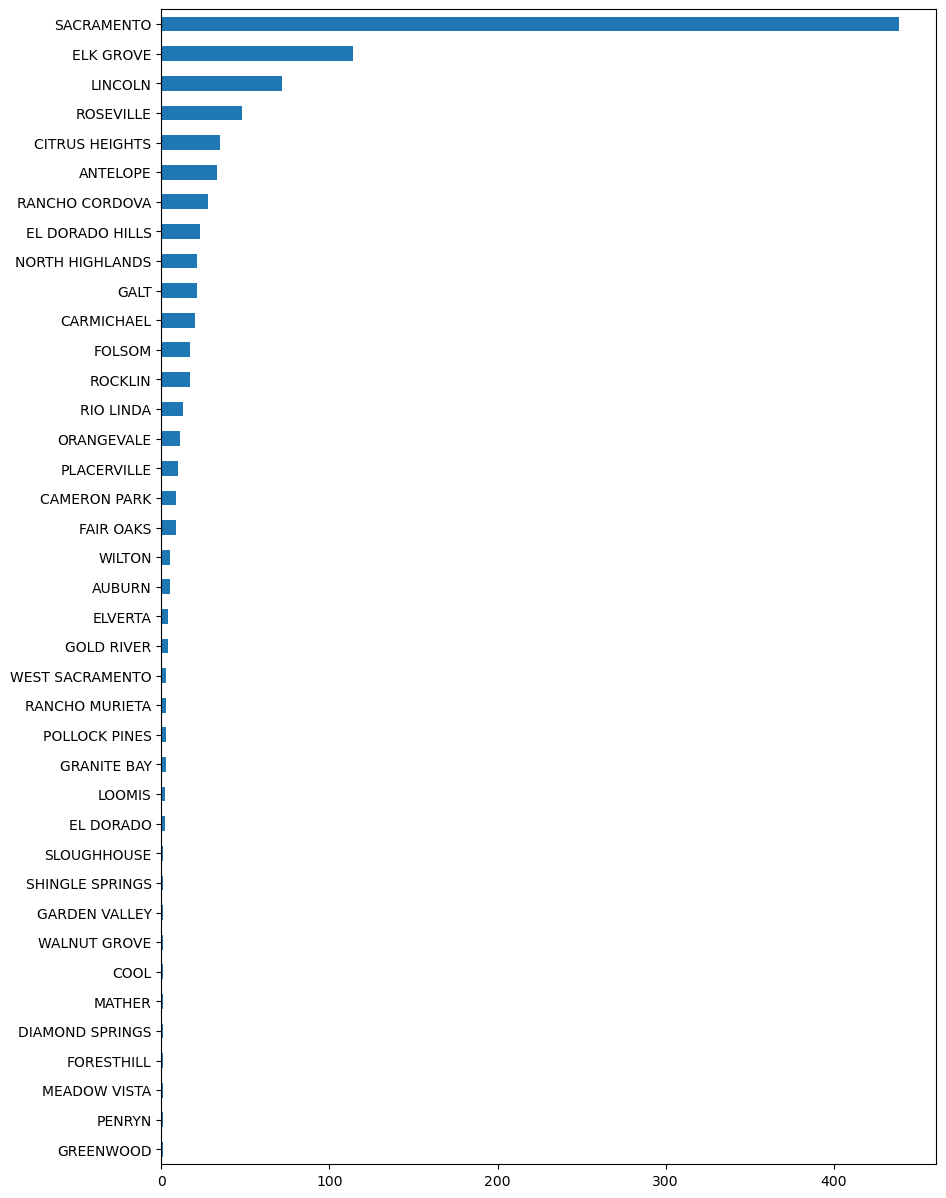

In [35]:
house['city'].value_counts().sort_values().plot(kind='barh', figsize=(10,15))

In [45]:
m = folium.Map(location=[38.575764, -121.478851], zoom_start=10)

for i in range(0,len(house.head(1000))):
    folium.Marker(
        location=[house.iloc[i]['latitude'], house.iloc[i]['longitude']]).add_to(m)
    
display(m)
                  


In [7]:
X = house['beds']

In [6]:
Y = house['price']

In [5]:
def draw_scatter_plot(X,Y):
    
    fig = plt.figure(figsize=(15,7))

    ax  = plt.gca()
    
    ax.scatter(X,Y, c='b')
    
    plt.show()

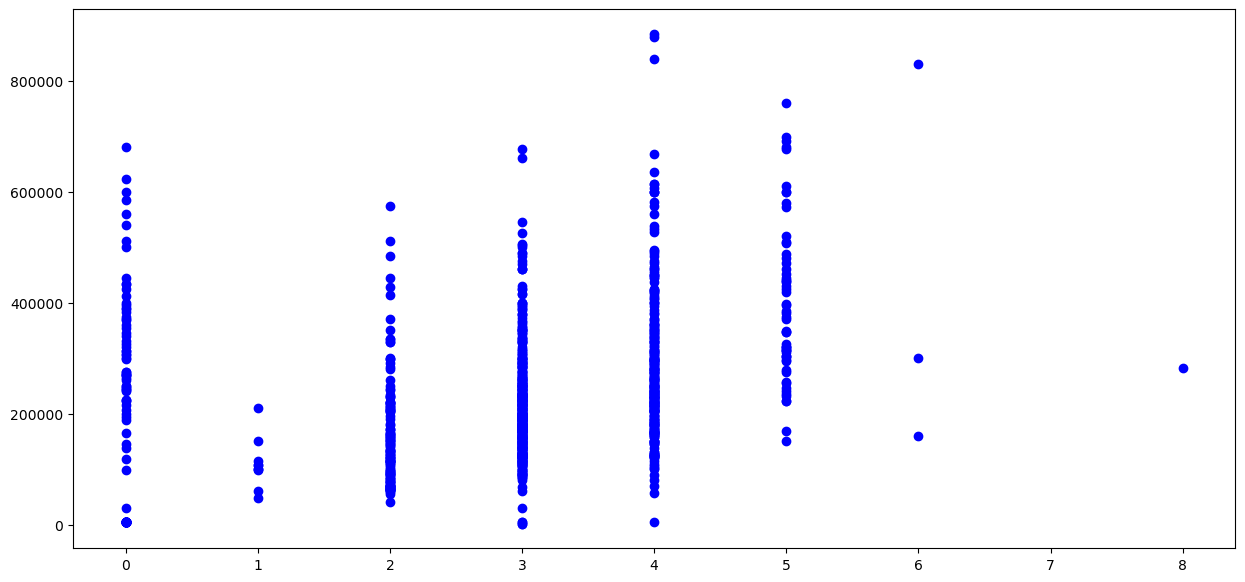

In [62]:
draw_scatter_plot(house['beds'],house['price'])

<AxesSubplot:>

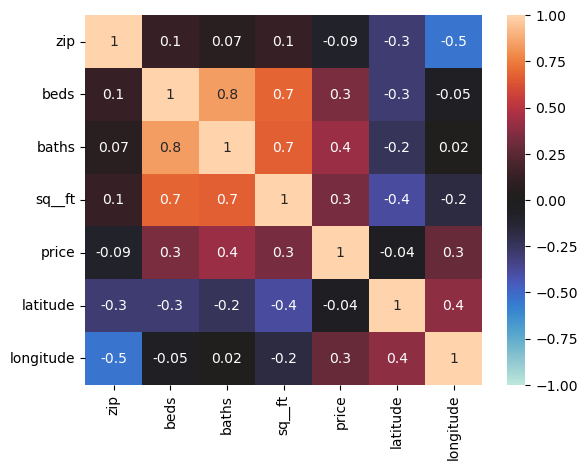

In [76]:
sns.heatmap(house.corr(),fmt='.1g',annot=True, vmin=-1, center=0)


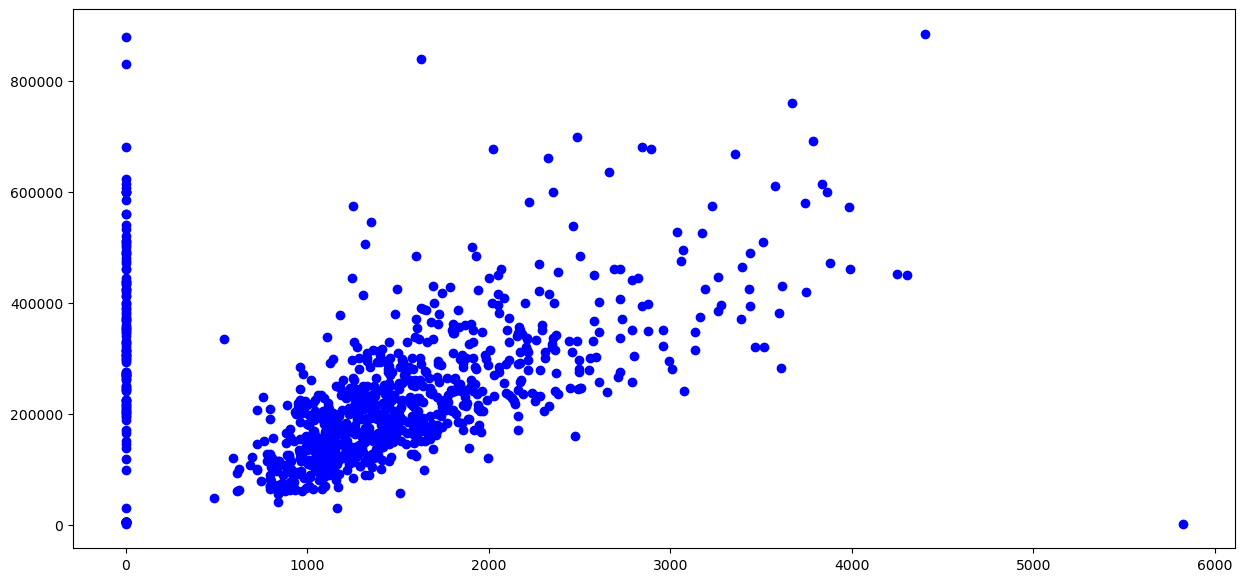

In [9]:
draw_scatter_plot(house['sq__ft'],house['price'])

In [10]:
house['y_hat'] = house['price'].mean()

In [12]:
house_1 = house[house['sq__ft'] !=0]

In [13]:
house_1.describe().T

,count,mean,std,min,25%,50%,75%,max
zip,814.0,95761.491400,8.534400e+01,95603.000000,95670.000000,95820.000000,95828.000000,95864.000000
beds,814.0,3.244472,8.521373e-01,1.000000,3.000000,3.000000,4.000000,8.000000
baths,814.0,1.960688,6.698038e-01,1.000000,2.000000,2.000000,2.000000,5.000000
sq__ft,814.0,1591.146192,6.638419e+02,484.000000,1144.000000,1418.500000,1851.000000,5822.000000
price,814.0,229448.369779,1.198256e+05,2000.000000,148750.000000,207986.500000,284973.250000,884790.000000
latitude,814.0,38.577044,1.263146e-01,38.241514,38.473885,38.591720,38.674704,39.008159
longitude,814.0,-121.378687,1.197365e-01,-121.550527,-121.451501,-121.405456,-121.325844,-120.597599
y_hat,814.0,234144.263959,2.883051e-09,234144.263959,234144.263959,234144.263959,234144.263959,234144.263959


In [15]:
X = house_1['sq__ft']
Y = house_1['price']

Yhat = house_1['y_hat']

In [24]:
def draw_plot(X, Y, Yhat):
    
    fig = plt.figure(figsize=(15,7))
    
    ax  = plt.gca()
    
    ax.scatter(X, Y, c='b')
    
    ax.plot(X, Yhat, color='r')
    
    plt.show()
    


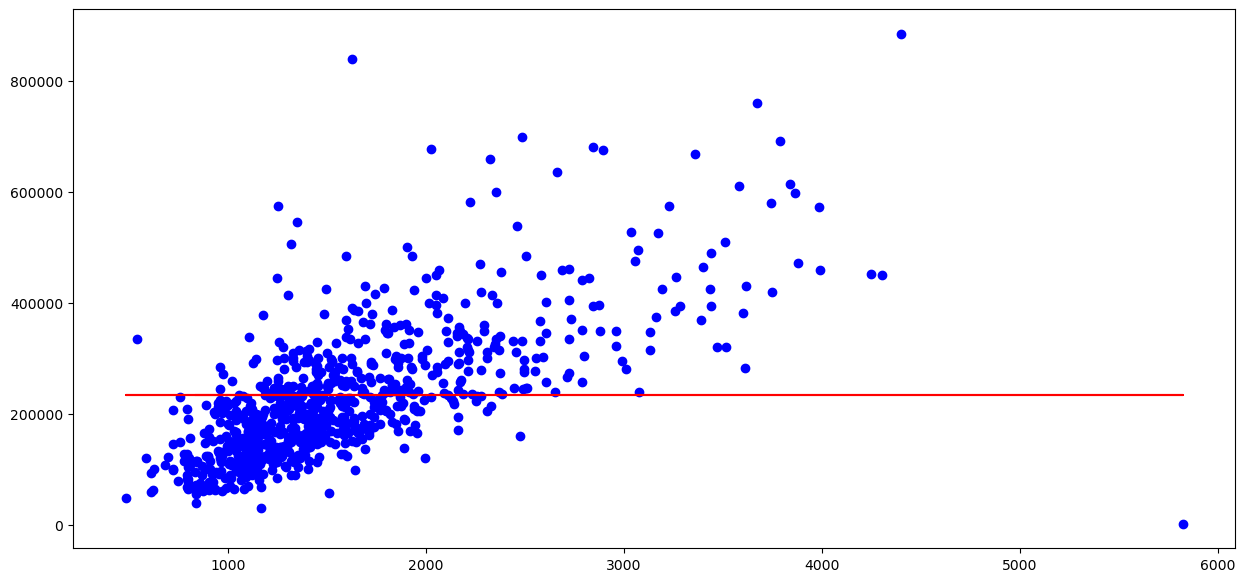

In [25]:
draw_plot(X, Y, Yhat)

In [28]:
res = abs(house_1['price'] - house_1['y_hat']).mean()
res

89178.91101784779

In [31]:
res = abs(house_1['price'] - house_1['y_hat']).mean()
res

89178.91101784779

In [32]:
X = house_1['sq__ft']
Y = house_1['price']

In [38]:
def calculate_beta_1(X,Y):
    Xbar = X.mean()
    Ybar = Y.mean()
    
    n = np.sum((Y-Ybar) * (X-Xbar))
    d = np.sum(np.square(X-Xbar))
    
    beta_1 = n/d
    
    return beta_1

In [40]:
beta_1 = calculate_beta_1(X, Y)
beta_1

125.21648667984462

In [45]:
def calculate_beta_0(X,Y):
    Xbar = X.mean()
    Ybar = Y.mean()
    
    beta_0 = Ybar - calculate_beta_1(X,Y) * Xbar
    
    return beta_0
    
    
    

In [46]:
beta_0 = calculate_beta_0(X,Y)
beta_0

30210.633866918943